# Import Library





In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Read Datasets 

menggunakan datasets keras

In [41]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Show Image

menampikan beberapa contoh image yang akan di modelkan

<function matplotlib.pyplot.show(*args, **kw)>

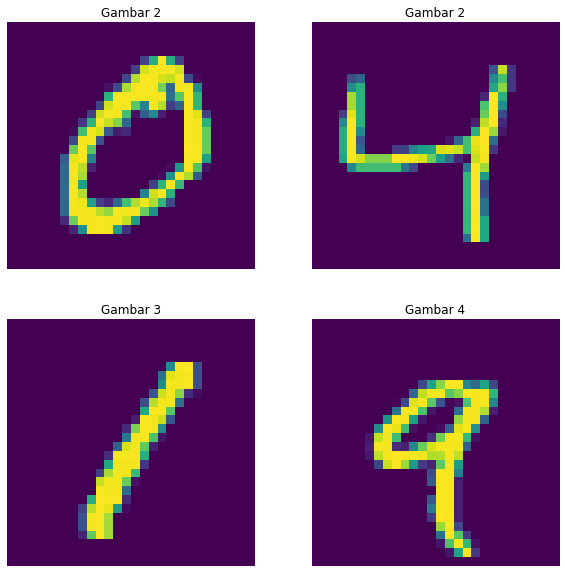

In [45]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)

plt.imshow(x_train_raw[1])
plt.axis('off')
plt.title("Gambar 2")
fig.add_subplot(2, 2, 2)
plt.imshow(x_train_raw[2])
plt.axis('off')
plt.title("Gambar 2")
fig.add_subplot(2, 2, 3)
plt.imshow(x_train_raw[3])
plt.axis('off')
plt.title("Gambar 3")
fig.add_subplot(2, 2, 4)
plt.imshow(x_train_raw[4])
plt.axis('off')
plt.title("Gambar 4")
plt.show

# Encoding 

In [50]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

# Dimension Reshaping

In [53]:
x_train = tf.reshape(x_train_raw, [60000, 784])
x_test = tf.reshape(x_test_raw, [10000, 784])

In [54]:
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

# Modelling

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 124)               31868     
                                                                 
 dense_8 (Dense)             (None, 128)               16000     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 582,406
Trainable params: 582,406
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs=8, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/8
469/469 [==============================] - 9s 17ms/step - loss: 0.2405 - accuracy: 0.9287 - val_loss: 0.1275 - val_accuracy: 0.9602
Epoch 2/8
469/469 [==============================] - 7s 16ms/step - loss: 0.0880 - accuracy: 0.9730 - val_loss: 0.0972 - val_accuracy: 0.9700
Epoch 3/8
469/469 [==============================] - 7s 15ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0749 - val_accuracy: 0.9764
Epoch 4/8
469/469 [==============================] - 8s 16ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0959 - val_accuracy: 0.9715
Epoch 5/8
469/469 [==============================] - 8s 17ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0764 - val_accuracy: 0.9784
Epoch 6/8
469/469 [==============================] - 8s 17ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0701 - val_accuracy: 0.9798
Epoch 7/8
469/469 [==============================] - 7s 16ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0666 - val_accuracy: 0.9811
Epoch 

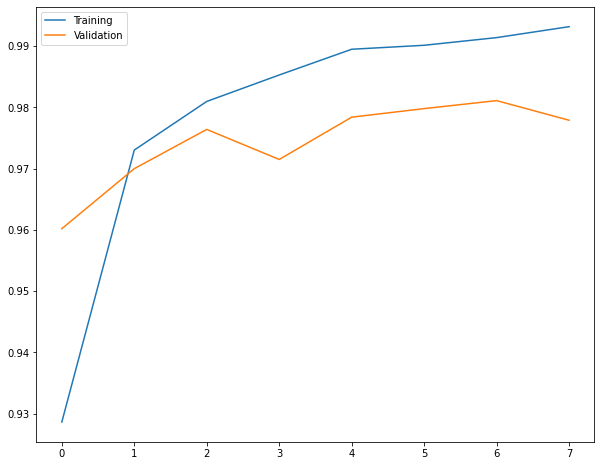

In [65]:
nilai_x = range(len(history.history['accuracy']))
plt.figure(figsize=[10,8])
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()